In [1]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from DatasetHandler  import *

In [2]:
def build_model(n_features, n_classes, num_layers=3):
    model = Sequential()
    n_2 = 27
    n_3 = 30
    print(n_2,n_3)
    model.add(Dense(n_2, input_dim=n_features, activation='relu'))
    model.add(Dense(n_3, activation='relu'))
    model.add(Dense(n_classes, activation='sigmoid'))
    return model

In [3]:
df = pd.read_csv('../datasets/Dataset.csv', index_col=False)
y = df['Label']
x = df.drop(columns=['Unnamed: 0', 'Label'])

In [4]:
df_test = pd.read_csv('../datasets/Test.csv', index_col=False)
y_test = df_test['Label']
x_test = df_test.drop(columns=['Unnamed: 0', 'Label'])

In [5]:
x, y = del_nan_with_label(x, y)
x_test, y_test = del_nan_with_label(x_test, y_test)

In [6]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
y = y.values
X_big_test = sc.transform(x_test)
Y_big_test = y_test.values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [8]:
n_features = x.shape[1]
dense_net = build_model(n_features, 1)
dense_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

27 30


In [9]:
history = dense_net.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=450, batch_size=10000)

Epoch 1/450
18/18 [==============================] - 1s 31ms/step - loss: 0.6813 - accuracy: 0.5574 - auc: 0.6651 - val_loss: 0.6653 - val_accuracy: 0.5711 - val_auc: 0.8624
Epoch 2/450
18/18 [==============================] - 0s 19ms/step - loss: 0.6524 - accuracy: 0.6312 - auc: 0.8731 - val_loss: 0.6370 - val_accuracy: 0.6876 - val_auc: 0.8714
Epoch 3/450
18/18 [==============================] - 0s 17ms/step - loss: 0.6221 - accuracy: 0.6859 - auc: 0.8742 - val_loss: 0.6038 - val_accuracy: 0.6842 - val_auc: 0.8764
Epoch 4/450
18/18 [==============================] - 0s 16ms/step - loss: 0.5854 - accuracy: 0.6815 - auc: 0.8831 - val_loss: 0.5624 - val_accuracy: 0.6969 - val_auc: 0.8913
Epoch 5/450
18/18 [==============================] - 0s 19ms/step - loss: 0.5428 - accuracy: 0.7725 - auc: 0.8908 - val_loss: 0.5194 - val_accuracy: 0.8533 - val_auc: 0.8959
Epoch 6/450
18/18 [==============================] - 0s 18ms/step - loss: 0.4992 - accuracy: 0.8352 - auc: 0.8890 - val_loss: 0.47

Epoch 48/450
18/18 [==============================] - 0s 17ms/step - loss: 0.2008 - accuracy: 0.9059 - auc: 0.9835 - val_loss: 0.1988 - val_accuracy: 0.9099 - val_auc: 0.9841
Epoch 49/450
18/18 [==============================] - 0s 18ms/step - loss: 0.1987 - accuracy: 0.9075 - auc: 0.9839 - val_loss: 0.1968 - val_accuracy: 0.9104 - val_auc: 0.9842
Epoch 50/450
18/18 [==============================] - 0s 18ms/step - loss: 0.1967 - accuracy: 0.9076 - auc: 0.9840 - val_loss: 0.1945 - val_accuracy: 0.9082 - val_auc: 0.9846
Epoch 51/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1944 - accuracy: 0.9084 - auc: 0.9843 - val_loss: 0.1925 - val_accuracy: 0.9081 - val_auc: 0.9846
Epoch 52/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1922 - accuracy: 0.9095 - auc: 0.9846 - val_loss: 0.1909 - val_accuracy: 0.9029 - val_auc: 0.9851
Epoch 53/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1904 - accuracy: 0.9090 - auc: 0.9845 - val_loss

Epoch 95/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1177 - accuracy: 0.9564 - auc: 0.9927 - val_loss: 0.1167 - val_accuracy: 0.9565 - val_auc: 0.9928
Epoch 96/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1166 - accuracy: 0.9570 - auc: 0.9928 - val_loss: 0.1157 - val_accuracy: 0.9571 - val_auc: 0.9930
Epoch 97/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1156 - accuracy: 0.9575 - auc: 0.9929 - val_loss: 0.1148 - val_accuracy: 0.9574 - val_auc: 0.9931
Epoch 98/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1144 - accuracy: 0.9580 - auc: 0.9930 - val_loss: 0.1137 - val_accuracy: 0.9574 - val_auc: 0.9931
Epoch 99/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1135 - accuracy: 0.9585 - auc: 0.9931 - val_loss: 0.1127 - val_accuracy: 0.9585 - val_auc: 0.9932
Epoch 100/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1126 - accuracy: 0.9589 - auc: 0.9932 - val_los

Epoch 188/450
18/18 [==============================] - 0s 16ms/step - loss: 0.0779 - accuracy: 0.9701 - auc: 0.9960 - val_loss: 0.0765 - val_accuracy: 0.9708 - val_auc: 0.9962
Epoch 189/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0775 - accuracy: 0.9703 - auc: 0.9961 - val_loss: 0.0762 - val_accuracy: 0.9708 - val_auc: 0.9962
Epoch 190/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0770 - accuracy: 0.9703 - auc: 0.9961 - val_loss: 0.0761 - val_accuracy: 0.9707 - val_auc: 0.9963
Epoch 191/450
18/18 [==============================] - 0s 19ms/step - loss: 0.0769 - accuracy: 0.9704 - auc: 0.9961 - val_loss: 0.0764 - val_accuracy: 0.9697 - val_auc: 0.9962
Epoch 192/450
18/18 [==============================] - 0s 19ms/step - loss: 0.0766 - accuracy: 0.9703 - auc: 0.9961 - val_loss: 0.0755 - val_accuracy: 0.9711 - val_auc: 0.9962
Epoch 193/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0763 - accuracy: 0.9705 - auc: 0.9962 - va

Epoch 281/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0577 - accuracy: 0.9803 - auc: 0.9974 - val_loss: 0.0574 - val_accuracy: 0.9794 - val_auc: 0.9976
Epoch 282/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0574 - accuracy: 0.9796 - auc: 0.9974 - val_loss: 0.0570 - val_accuracy: 0.9794 - val_auc: 0.9976
Epoch 283/450
18/18 [==============================] - 0s 16ms/step - loss: 0.0576 - accuracy: 0.9801 - auc: 0.9973 - val_loss: 0.0577 - val_accuracy: 0.9792 - val_auc: 0.9976
Epoch 284/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0571 - accuracy: 0.9805 - auc: 0.9974 - val_loss: 0.0568 - val_accuracy: 0.9793 - val_auc: 0.9976
Epoch 285/450
18/18 [==============================] - 0s 19ms/step - loss: 0.0572 - accuracy: 0.9803 - auc: 0.9974 - val_loss: 0.0568 - val_accuracy: 0.9835 - val_auc: 0.9976
Epoch 286/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0572 - accuracy: 0.9801 - auc: 0.9974 - va

Epoch 374/450
18/18 [==============================] - 0s 20ms/step - loss: 0.0453 - accuracy: 0.9844 - auc: 0.9982 - val_loss: 0.0448 - val_accuracy: 0.9872 - val_auc: 0.9983
Epoch 375/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0452 - accuracy: 0.9847 - auc: 0.9982 - val_loss: 0.0455 - val_accuracy: 0.9817 - val_auc: 0.9982
Epoch 376/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0451 - accuracy: 0.9849 - auc: 0.9982 - val_loss: 0.0456 - val_accuracy: 0.9818 - val_auc: 0.9983
Epoch 377/450
18/18 [==============================] - 0s 18ms/step - loss: 0.0454 - accuracy: 0.9840 - auc: 0.9982 - val_loss: 0.0447 - val_accuracy: 0.9857 - val_auc: 0.9983
Epoch 378/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0451 - accuracy: 0.9847 - auc: 0.9982 - val_loss: 0.0452 - val_accuracy: 0.9818 - val_auc: 0.9983
Epoch 379/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0451 - accuracy: 0.9846 - auc: 0.9982 - va

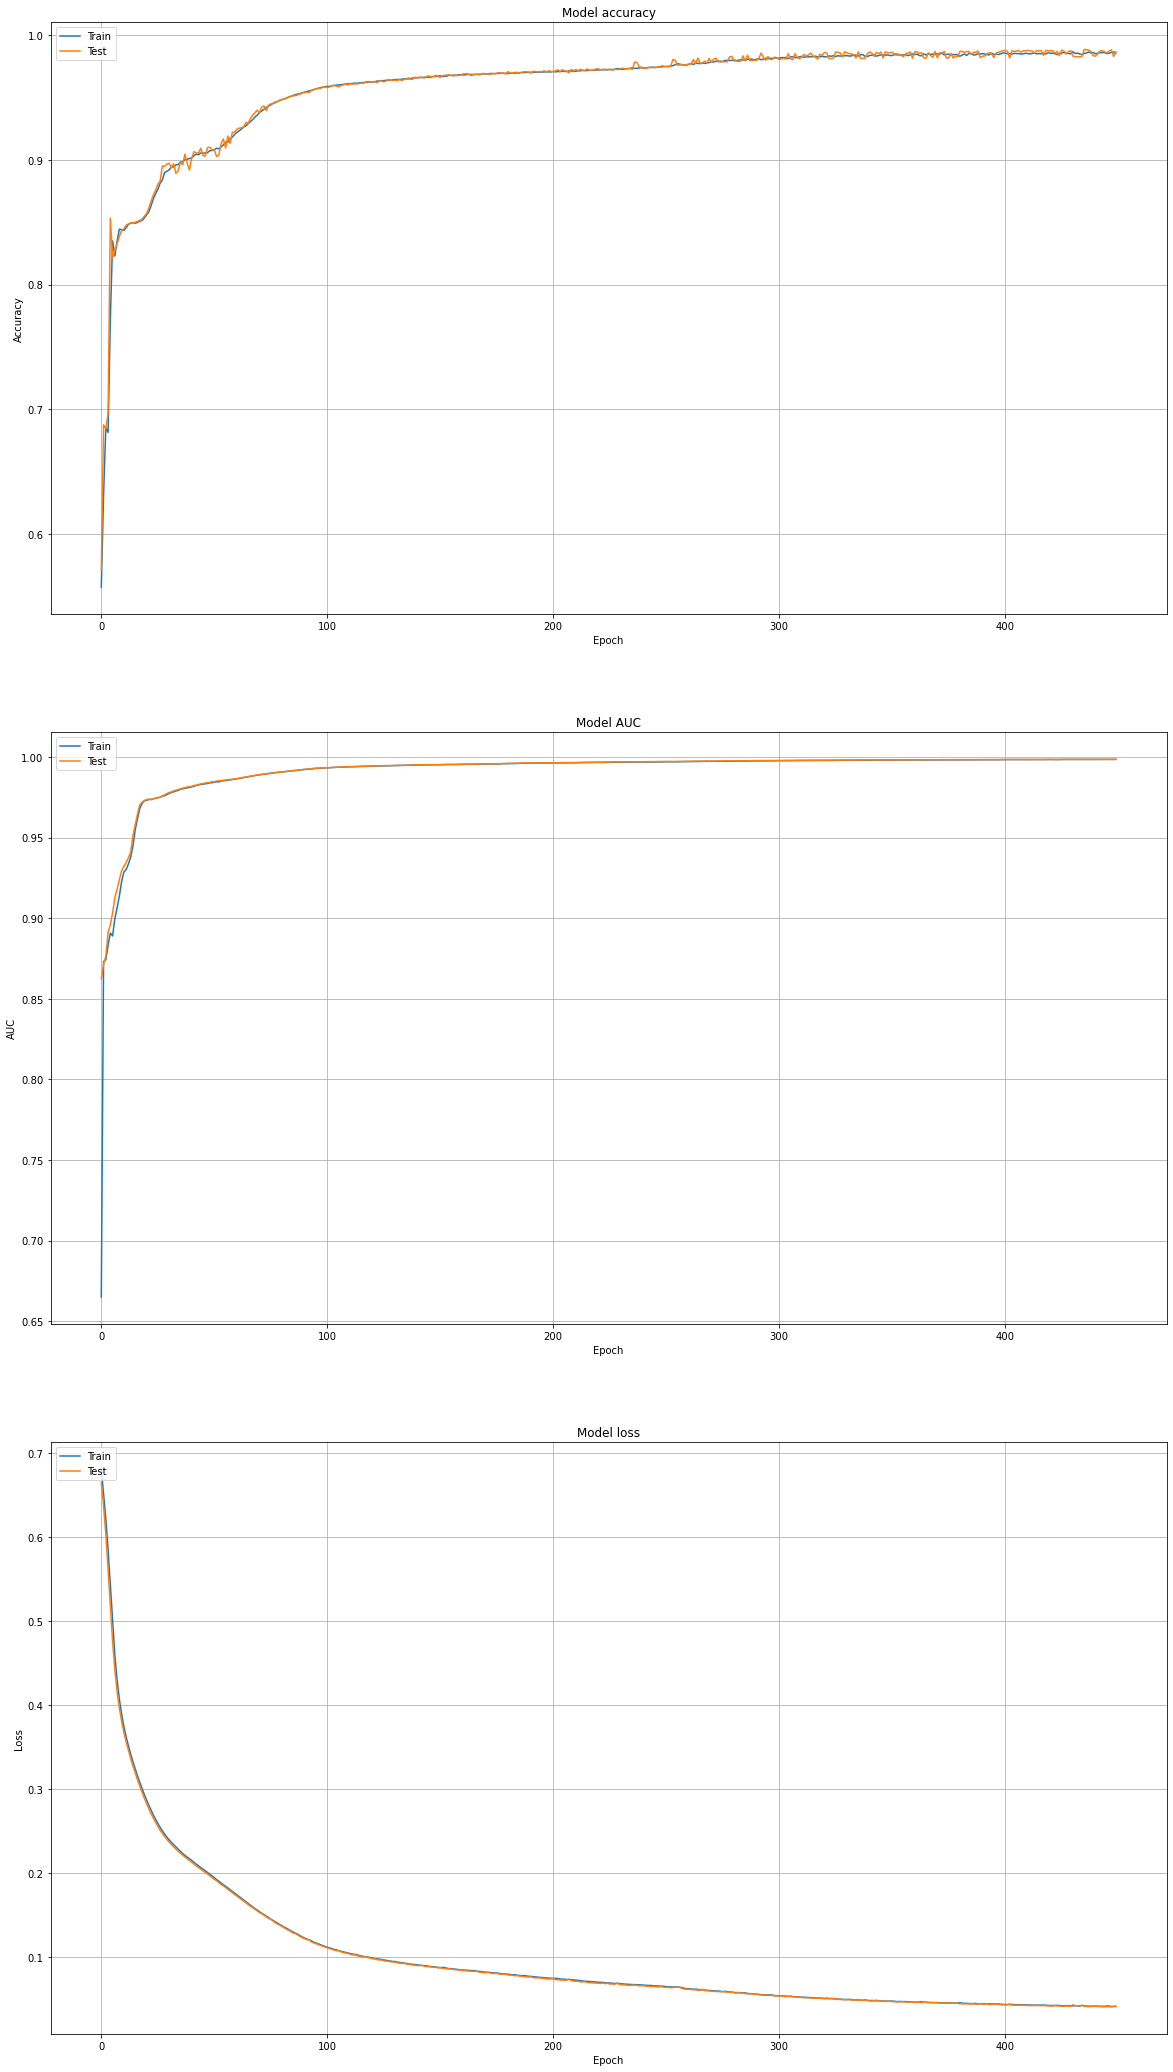

In [10]:
show_nn_metrics(history)

Метрики для большой тестовой выборки

In [11]:
dense_net.evaluate(X_big_test, Y_big_test)

12452/12452 [==============================] - 6s 503us/step - loss: 0.0437 - accuracy: 0.9862 - auc: 0.9984


[0.04368607699871063, 0.9861741662025452, 0.9983987212181091]

In [12]:
dense_net.evaluate(x_test,y_test)

1370/1370 [==============================] - 1s 577us/step - loss: 0.0410 - accuracy: 0.9868 - auc: 0.9985


[0.04102765768766403, 0.9868124127388, 0.9985393285751343]

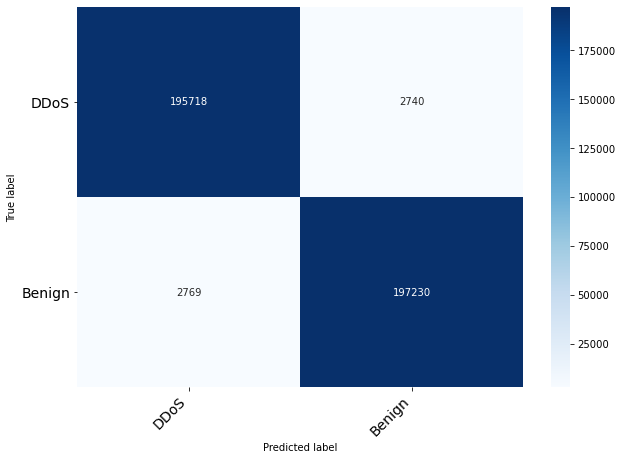

In [13]:
from sklearn.metrics import confusion_matrix
cf_lgb = confusion_matrix(Y_big_test, dense_net.predict(X_big_test).round(0))
fig2 = print_confusion_matrix(cf_lgb,["DDoS","Benign"])

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, dense_net.predict(x_test))

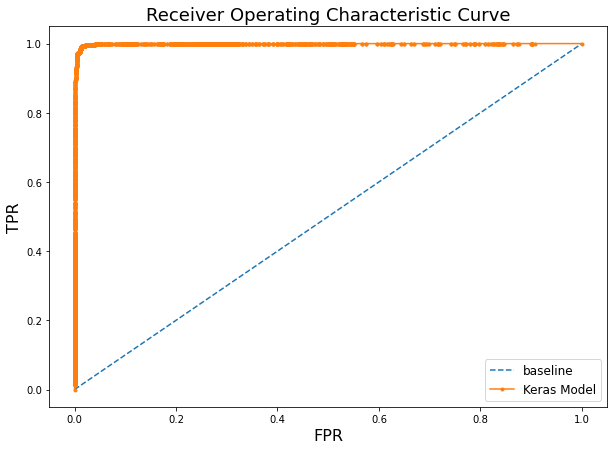

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
ax.plot(fpr, tpr,label= 'Keras Model',marker='.')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);